In [149]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import wordcloud
import datetime


In [12]:
df = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/USvideos.csv')

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [103]:
df.describe()

,category_id,views,likes,dislikes,comment_count,like_rate,dislike_rate,comment_rate,title_length
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,3.441298,0.161415,0.445307,48.578183
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,2.700864,0.375836,0.573648,19.619025
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,3.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,1.496722,0.055582,0.160724,34.000000
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,2.827332,0.091514,0.296114,46.000000
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,4.675136,0.160079,0.521365,61.000000
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,29.046646,19.153148,11.764299,100.000000


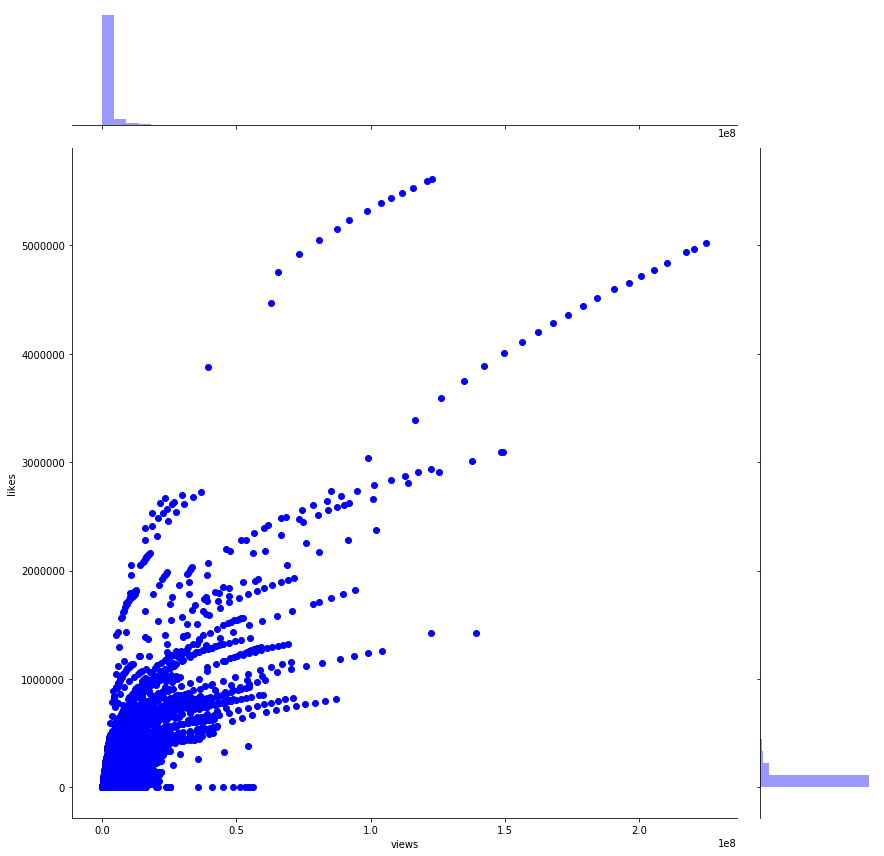

In [97]:

sns.jointplot(x='views',y='likes',data=df,color='blue', height=12)

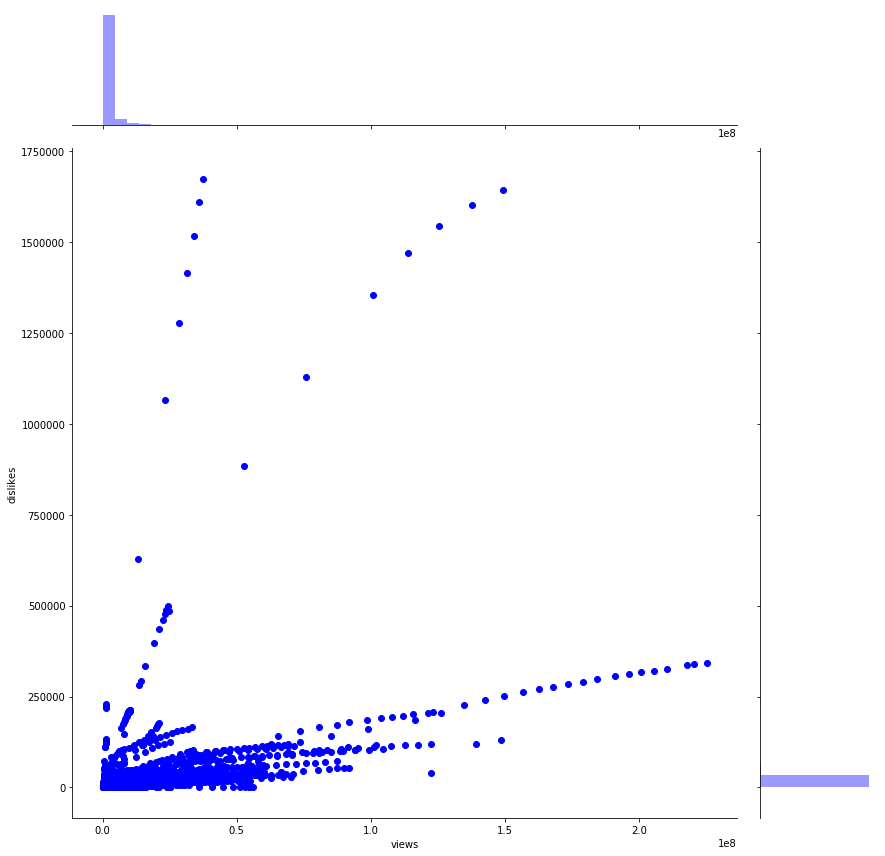

In [99]:
sns.jointplot(x='views',y='dislikes',data=df,color='blue',height=12)

In [15]:
correlation = ['views', 'likes', 'dislikes', 'comment_count']

In [16]:
corr_data = df[correlation].corr() 
display(corr_data)

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


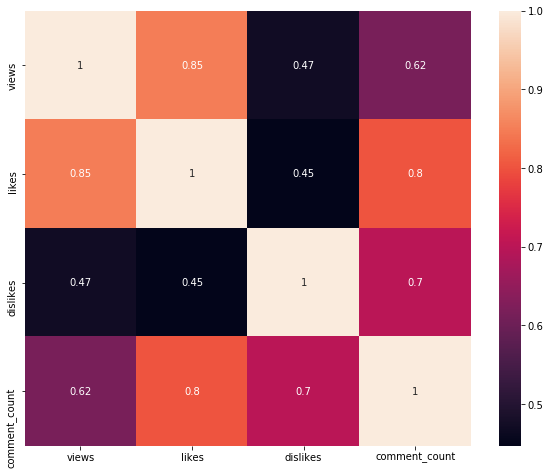

In [105]:
plt.figure(figsize = (10,8))

sns.heatmap(corr_data, annot=True)

In [37]:
#Category Names found in accom
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'

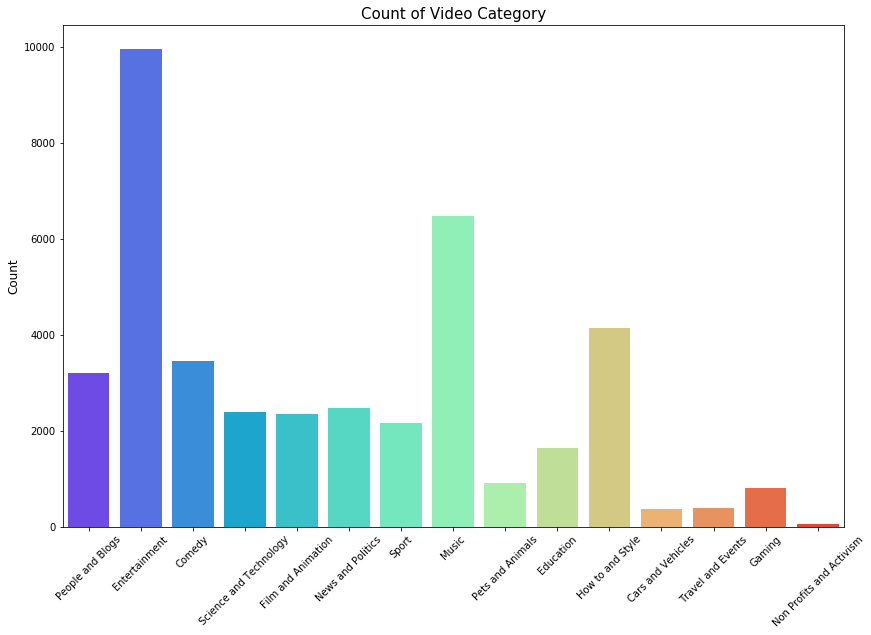

In [144]:
plt.figure(figsize = (14,9))

g = sns.countplot('category_name', data=df, palette="rainbow")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Count of Video Category", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(hspace = 0.9, top = 0.9)


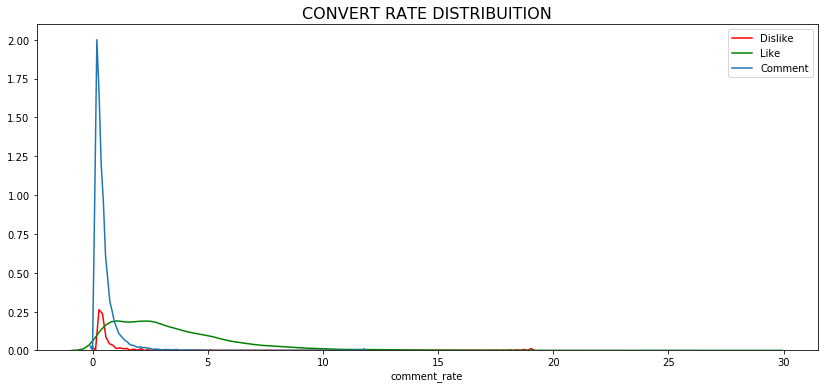

In [50]:
df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100


plt.figure(figsize = (14,6))

gsdf1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

Text(0, 0.5, 'Like rate')

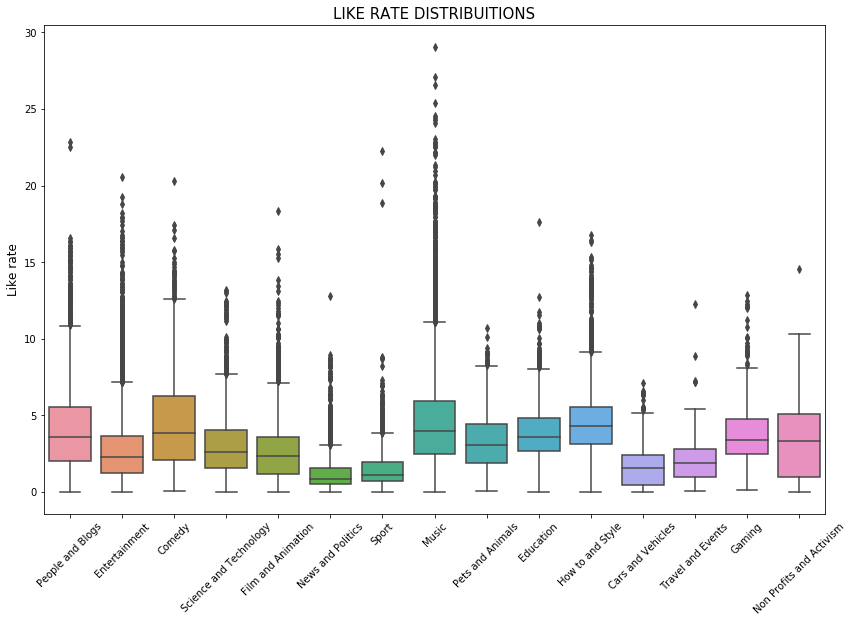

In [153]:
plt.figure(figsize = (14,9))

g= sns.boxplot(x='category_name',y='like_rate',  data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

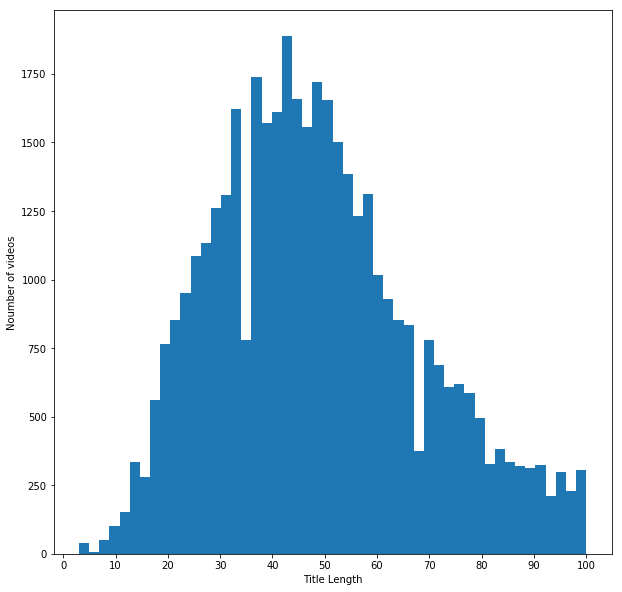

In [143]:
df["title_length"] = df["title"].apply(lambda x: len(x))


fig, ax = plt.subplots(figsize=(10,10))
g3 = sns.distplot(df["title_length"], kde=False, rug=False, 
                 hist_kws={'alpha': 1}, ax=ax)
g3 = ax.set(xlabel="Title Length", ylabel="Noumber of videos", xticks=range(0, 110, 10))

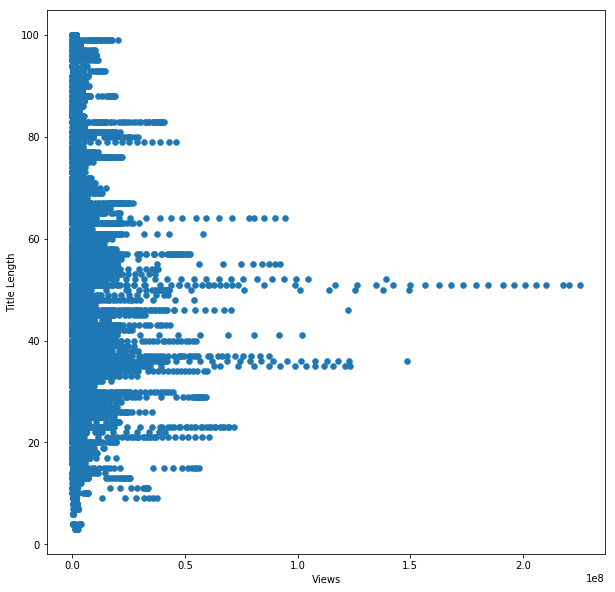

In [132]:
fig, ax = plt.subplots(figsize=(10,10))
g4 = ax.scatter(x=df['views'], y=df['title_length'], linewidths=0.5)
g4 = ax.set(xlabel="Views", ylabel="Title Length")

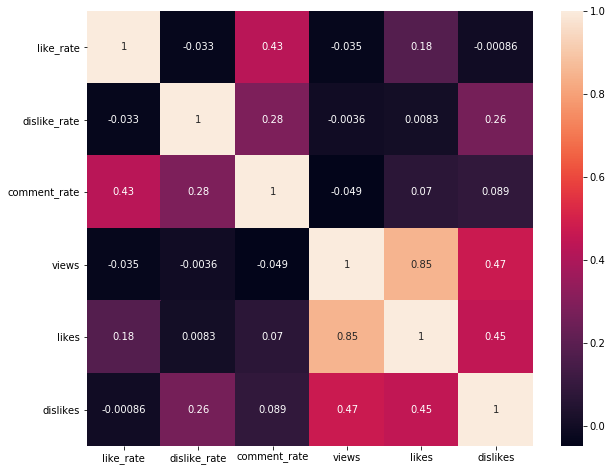

In [128]:

new_corr_df = df[['like_rate', 'dislike_rate', 'comment_rate',
         'views','likes','dislikes', "category_name"]].corr()


plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(new_corr_df, annot=True)
plt.show()

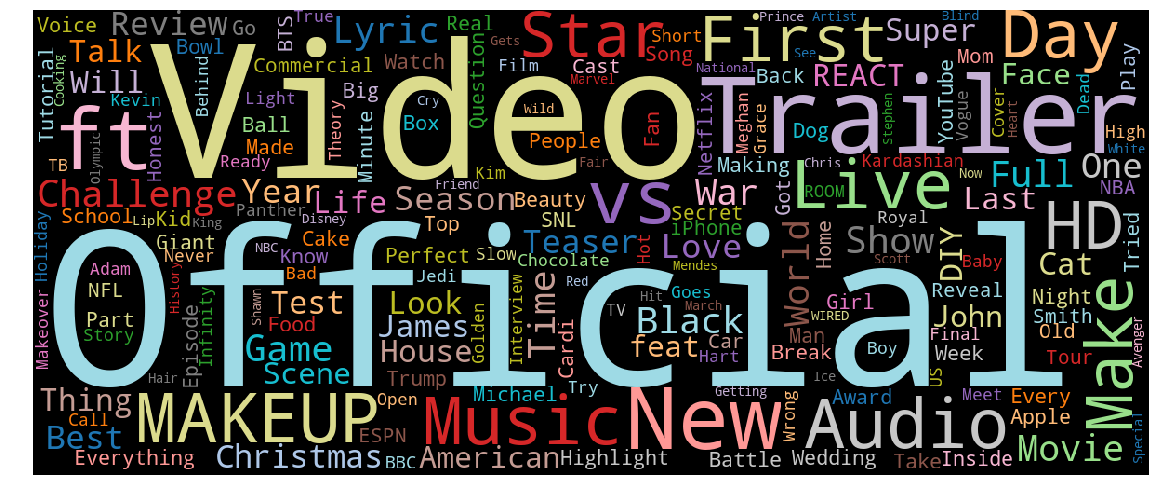

In [131]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="Black", 
                         colormap="tab20").generate(" ".join(title_words))
plt.figure(figsize=(20,15))
plt.imshow(wc)
ax = plt.axis("off")

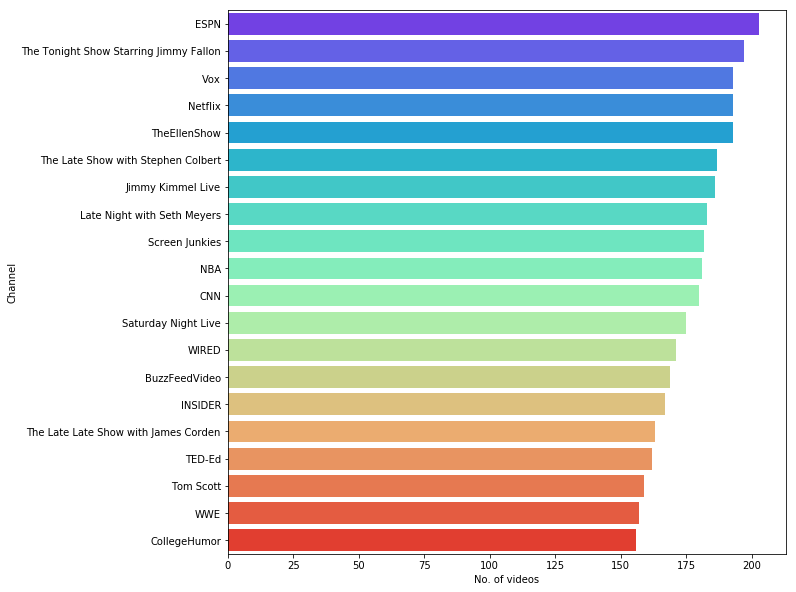

In [152]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10,10))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette='rainbow', ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [81]:

n example value of the publish_time column in our dataset is 2017-11-13T17:13:01.000Z. And according to information on this page: https://www.w3.org/TR/NOTE-datetime, 
                this means that the date of publishing the video is 2017-11-13 and the time is 17:13:01 in Coordinated Universal Time (UTC) time zone.

df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])

df.drop(labels='publish_time', axis=1, inplace=True)

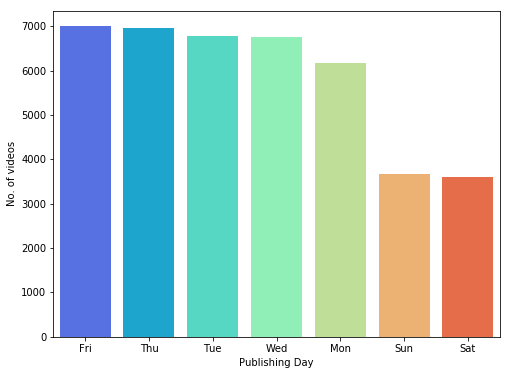

In [141]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette='rainbow', ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

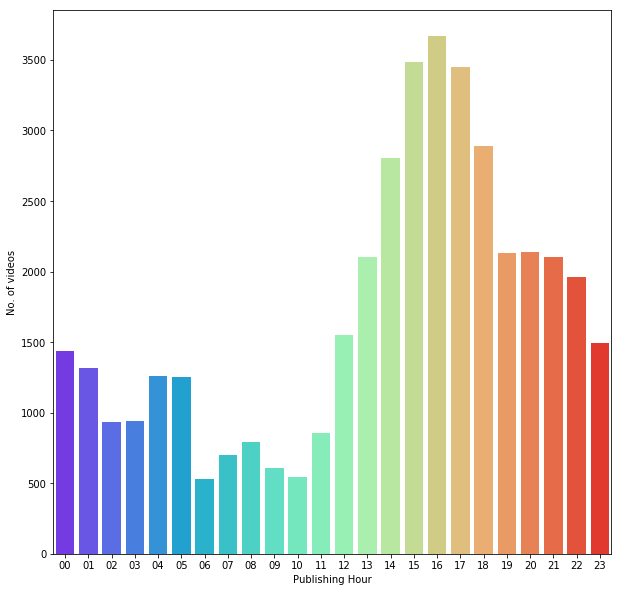

In [142]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots(figsize=(10,10))
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette='rainbow', ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

In [147]:
#this usecase I'm electing to simply drop them
col_list = ['video_id', 'views', 'likes', 'dislikes', 'comment_count']

us = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/USvideos.csv', usecols=col_list) #USA, remaking the dataframe in the same format as the others
ca = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/CAvideos.csv', usecols=col_list) #Canada
de = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/DEvideos.csv', usecols=col_list) #Germany
fr = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/FRvideos.csv', usecols=col_list) #France
gb = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/GBvideos.csv', usecols=col_list) #United Kingdom 
ind = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/INvideos.csv', usecols=col_list) #India
jp = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/JPvideos.csv', usecols=col_list) #Japan
kr = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/KRvideos.csv', usecols=col_list) #South Korea
mx = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/MXvideos.csv', usecols=col_list) #Mexico
ru = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/RUvideos.csv', usecols=col_list) #Russia

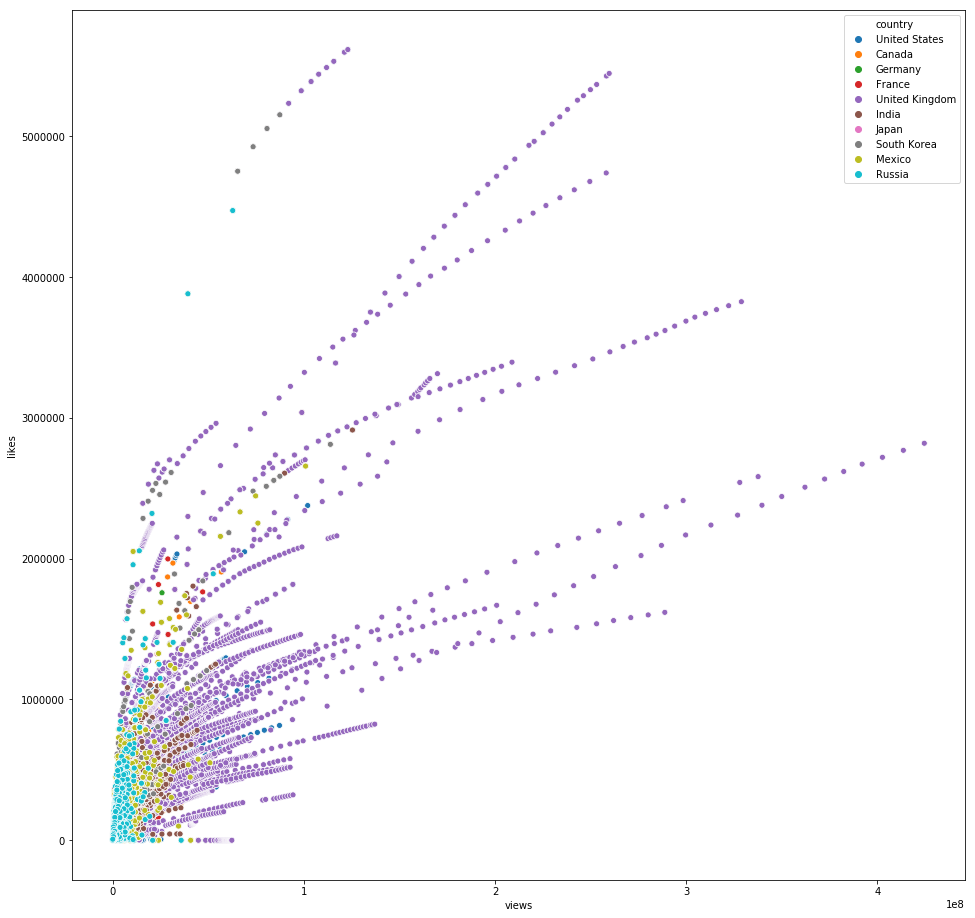

In [150]:

df_list = [us, ca, de, fr, gb, ind, jp, kr, mx, ru]
df_name_list = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']

Master_df = pd.DataFrame(columns=['views', 'likes', 'country'])

for i in range (len(df_list)):
    combine = np.full((len(df_list[i])),df_name_list[i])
    df_list[i]['country'] = combine
    Master_df = pd.merge(Master_df,df_list[i], how='outer')
    
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["likes"], hue=Master_df["country"])
    

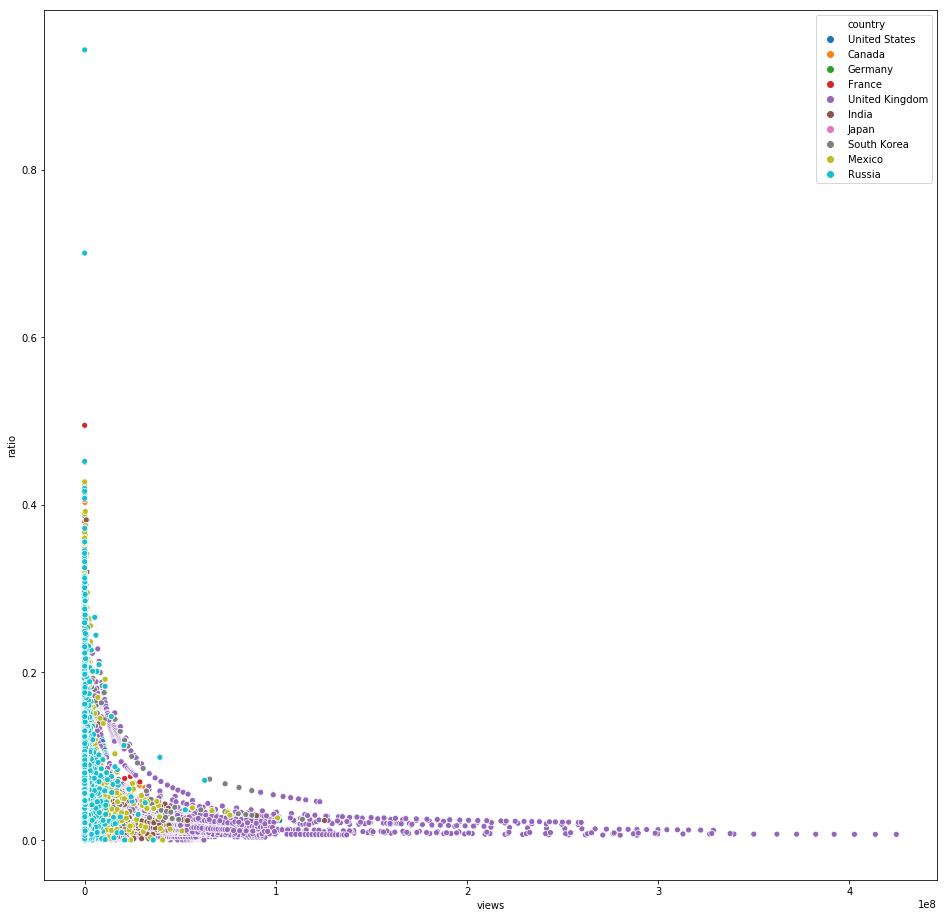

In [151]:
views = Master_df["views"]
likes = Master_df["likes"]
ratio = likes/views
Master_df["ratio"] = ratio
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=Master_df["views"], y=Master_df["ratio"], hue=Master_df["country"])